In [2]:
import torch
import numpy as np

print(torch.__version__)
print(torch.cuda.is_available())

2.4.0+cu121
True


## Basic Tensor

In [3]:
#Create sample tensors
a = torch.rand(4,3)
b = torch.rand(4,3)
c = torch.rand(3,5)
a, b, c

(tensor([[0.2914, 0.6685, 0.2271],
         [0.5631, 0.1829, 0.0471],
         [0.5195, 0.8450, 0.6883],
         [0.0443, 0.5472, 0.1924]]),
 tensor([[0.5322, 0.1716, 0.2875],
         [0.9586, 0.6919, 0.7555],
         [0.2160, 0.5998, 0.6735],
         [0.8820, 0.8708, 0.2692]]),
 tensor([[0.4603, 0.1570, 0.2827, 0.1913, 0.8550],
         [0.6116, 0.6364, 0.1229, 0.7199, 0.5347],
         [0.3349, 0.7698, 0.3914, 0.0439, 0.6933]]))

In [4]:
#Tensor addition
torch.add(a,b)

tensor([[0.8236, 0.8402, 0.5146],
        [1.5217, 0.8749, 0.8026],
        [0.7354, 1.4448, 1.3618],
        [0.9264, 1.4180, 0.4615]])

In [5]:
#Tensor multiplication
torch.mm(a, c)

tensor([[0.6191, 0.6460, 0.2535, 0.5470, 0.7641],
        [0.3868, 0.2411, 0.2001, 0.2414, 0.6119],
        [0.9864, 1.1491, 0.5201, 0.7378, 1.3731],
        [0.4195, 0.5033, 0.1551, 0.4108, 0.4639]])

In [6]:
#Tensor multiplication v2
torch.matmul(a, c)

tensor([[0.6191, 0.6460, 0.2535, 0.5470, 0.7641],
        [0.3868, 0.2411, 0.2001, 0.2414, 0.6119],
        [0.9864, 1.1491, 0.5201, 0.7378, 1.3731],
        [0.4195, 0.5033, 0.1551, 0.4108, 0.4639]])

In [7]:
#Convert to np array
a = a.numpy()
a

array([[0.29144782, 0.66854995, 0.2271474 ],
       [0.5631038 , 0.18293345, 0.04708451],
       [0.5194556 , 0.84498894, 0.6882874 ],
       [0.04434669, 0.54717827, 0.19238156]], dtype=float32)

In [8]:
#Reshape
b.reshape(3,4)
b

tensor([[0.5322, 0.1716, 0.2875],
        [0.9586, 0.6919, 0.7555],
        [0.2160, 0.5998, 0.6735],
        [0.8820, 0.8708, 0.2692]])

In [9]:
#Transpose
c.T

tensor([[0.4603, 0.6116, 0.3349],
        [0.1570, 0.6364, 0.7698],
        [0.2827, 0.1229, 0.3914],
        [0.1913, 0.7199, 0.0439],
        [0.8550, 0.5347, 0.6933]])

## Simple MLP

In [10]:
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt
import torch.nn.functional as F
from tqdm import tqdm

In [11]:
#Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

#cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [12]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features=n_features, out_features=2)
        self.fc2 = nn.Linear(2, 1)

    def forward(self, x):
        x = (self.fc1(x))
        x = (self.fc2(x))
        return x

In [13]:
model = MLP()

In [14]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
#Training loop
num_epochs = 100
for epoch in range(num_epochs):
    #Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    #Backward pass and update
    loss.backward()
    optimizer.step()

    #Zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 312.2418
epoch: 20, loss = 312.2170
epoch: 30, loss = 312.2170
epoch: 40, loss = 312.2170
epoch: 50, loss = 312.2170
epoch: 60, loss = 312.2170
epoch: 70, loss = 312.2170
epoch: 80, loss = 312.2170
epoch: 90, loss = 312.2170
epoch: 100, loss = 312.2170


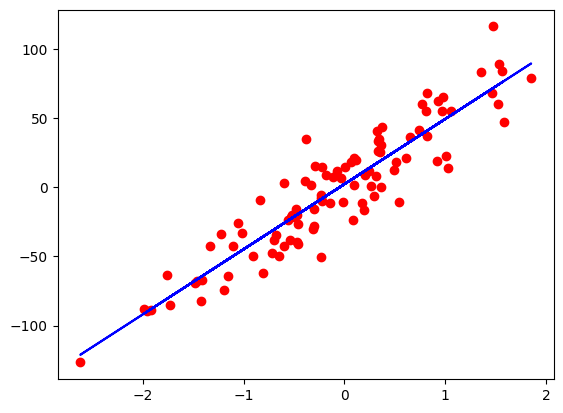

In [16]:
#Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

## CNN MNIST

In [17]:
import torchvision
import torchvision.transforms as transforms

In [18]:
#MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

#Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=64,
                                          shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 2672506.37it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 495053.76it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 915513.36it/s] 


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4124383.80it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



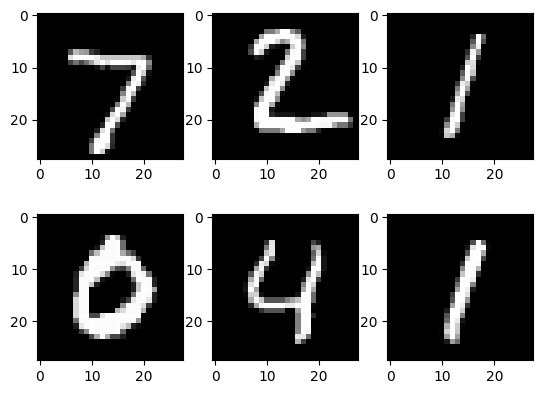

In [19]:
examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [20]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  #24,24,6 -> 12,12,6
        x = self.pool(F.relu(self.conv2(x)))  #8,8,16 -> 4,4,16
        x = x.view(-1, 16 * 4 * 4)  #Flatten
        x = F.relu(self.fc1(x))   #FC
        x = F.relu(self.fc2(x))   #FC
        x = self.fc3(x)
        return x


In [21]:
def train_step(model, epoch, loss_function, optimizer, loss_train_epoch):
    model.train()
    epoch_loss = []
    correct = 0
    loop = tqdm(enumerate(train_loader))
    loop.set_description(f"Epoch {epoch}")
    for batch_idx, (data, target) in loop:

        data, target = data.to(device='cuda'), target.to(device='cuda')

        output = model(data)
        loss = loss_function(output, target)
        epoch_loss.append(loss.item())
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loop.set_postfix(
            {
                "Iter": "[{}/{}] | Epoch_Loss: {} | Batch_Loss: {} | Accuracy: {:.0f}%".format(
                    batch_idx * len(data),
                    len(train_loader.dataset),
                    sum(epoch_loss) / len(epoch_loss),
                    loss.item(),
                    100.0 * correct / len(train_loader.dataset)
                ),
            }
        )
    loss_train_epoch.append(sum(epoch_loss) / len(epoch_loss))

    return loss_train_epoch


def test(model, loss_function, loss_test_epoch, epoch_auc_history):
    model.eval()
    test_loss_list = []
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device='cuda'), target.to(device='cuda')

            output = model(data)
            test_loss_list.append(loss_function(output, target).item())
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss = sum(test_loss_list) / len(test_loss_list)
    loss_test_epoch.append(test_loss)
    epoch_auc_history.append(correct / 100)

    print(
        "Test set: Average loss: {:.4f} | Accuracy: {}/{} ({:.0f}%)\n".format(
            test_loss,
            correct,
            len(test_loader.dataset),
            100.0 * correct / len(test_loader.dataset),
        )
    )

    return correct, loss_test_epoch, epoch_auc_history

In [22]:
num_epochs = 30
learning_rate = 0.01
loss_train_epoch = []
epoch_auc_history = []
loss_test_epoch = []

model = ConvNet().to(device='cuda')

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.7)

for epoch in range(1, num_epochs):
    loss_train_epoch = train_step(model, epoch, loss_function, optimizer, loss_train_epoch)

    acc, loss_test_epoch, epoch_auc_history = test(model, loss_function, loss_test_epoch, epoch_auc_history)

    scheduler.step()


Epoch 1: : 938it [00:14, 64.61it/s, Iter=[29984/60000] | Epoch_Loss: 2.276901212582456 | Batch_Loss: 2.122720956802368 | Accuracy: 19%]


Test set: Average loss: 2.1308 | Accuracy: 5911/10000 (59%)



Epoch 2: : 938it [00:13, 68.76it/s, Iter=[29984/60000] | Epoch_Loss: 0.6913612598279265 | Batch_Loss: 0.41989782452583313 | Accuracy: 82%]


Test set: Average loss: 0.4109 | Accuracy: 8562/10000 (86%)



Epoch 3: : 938it [00:13, 71.65it/s, Iter=[29984/60000] | Epoch_Loss: 0.2432773117341403 | Batch_Loss: 0.3886612355709076 | Accuracy: 93%]


Test set: Average loss: 0.1916 | Accuracy: 9416/10000 (94%)



Epoch 4: : 938it [00:13, 71.40it/s, Iter=[29984/60000] | Epoch_Loss: 0.17282372422770523 | Batch_Loss: 0.04263412207365036 | Accuracy: 95%]


Test set: Average loss: 0.1296 | Accuracy: 9599/10000 (96%)



Epoch 5: : 938it [00:13, 71.35it/s, Iter=[29984/60000] | Epoch_Loss: 0.13547512087355384 | Batch_Loss: 0.07061547785997391 | Accuracy: 96%]


Test set: Average loss: 0.1105 | Accuracy: 9666/10000 (97%)



Epoch 6: : 938it [00:13, 71.74it/s, Iter=[29984/60000] | Epoch_Loss: 0.11138917185636217 | Batch_Loss: 0.13771091401576996 | Accuracy: 97%]


Test set: Average loss: 0.1000 | Accuracy: 9666/10000 (97%)



Epoch 7: : 938it [00:13, 71.10it/s, Iter=[29984/60000] | Epoch_Loss: 0.1008532813845524 | Batch_Loss: 0.3751433193683624 | Accuracy: 97%]


Test set: Average loss: 0.0957 | Accuracy: 9686/10000 (97%)



Epoch 8: : 938it [00:13, 72.09it/s, Iter=[29984/60000] | Epoch_Loss: 0.09213230511479413 | Batch_Loss: 0.029430754482746124 | Accuracy: 97%]


Test set: Average loss: 0.0769 | Accuracy: 9741/10000 (97%)



Epoch 9: : 938it [00:13, 71.05it/s, Iter=[29984/60000] | Epoch_Loss: 0.08578374267105005 | Batch_Loss: 0.042579494416713715 | Accuracy: 97%]


Test set: Average loss: 0.0805 | Accuracy: 9747/10000 (97%)



Epoch 10: : 938it [00:13, 70.39it/s, Iter=[29984/60000] | Epoch_Loss: 0.08000175992616697 | Batch_Loss: 0.028810415416955948 | Accuracy: 98%]


Test set: Average loss: 0.0660 | Accuracy: 9779/10000 (98%)



Epoch 11: : 938it [00:13, 70.57it/s, Iter=[29984/60000] | Epoch_Loss: 0.07338510830598727 | Batch_Loss: 0.007822658866643906 | Accuracy: 98%]


Test set: Average loss: 0.0775 | Accuracy: 9747/10000 (97%)



Epoch 12: : 938it [00:13, 70.14it/s, Iter=[29984/60000] | Epoch_Loss: 0.07037814366005694 | Batch_Loss: 0.11075671017169952 | Accuracy: 98%]


Test set: Average loss: 0.0644 | Accuracy: 9782/10000 (98%)



Epoch 13: : 938it [00:13, 71.09it/s, Iter=[29984/60000] | Epoch_Loss: 0.06792220783664156 | Batch_Loss: 0.08026691526174545 | Accuracy: 98%]


Test set: Average loss: 0.0607 | Accuracy: 9798/10000 (98%)



Epoch 14: : 938it [00:13, 71.71it/s, Iter=[29984/60000] | Epoch_Loss: 0.0656816164113041 | Batch_Loss: 0.009568402543663979 | Accuracy: 98%]


Test set: Average loss: 0.0570 | Accuracy: 9819/10000 (98%)



Epoch 15: : 938it [00:13, 71.18it/s, Iter=[29984/60000] | Epoch_Loss: 0.06287122994233399 | Batch_Loss: 0.14489218592643738 | Accuracy: 98%]


Test set: Average loss: 0.0562 | Accuracy: 9813/10000 (98%)



Epoch 16: : 938it [00:13, 71.15it/s, Iter=[29984/60000] | Epoch_Loss: 0.05953939873124483 | Batch_Loss: 0.0038109528832137585 | Accuracy: 98%]


Test set: Average loss: 0.0582 | Accuracy: 9805/10000 (98%)



Epoch 17: : 938it [00:13, 71.96it/s, Iter=[29984/60000] | Epoch_Loss: 0.05834513037889473 | Batch_Loss: 0.03865615278482437 | Accuracy: 98%]


Test set: Average loss: 0.0529 | Accuracy: 9817/10000 (98%)



Epoch 18: : 938it [00:13, 71.59it/s, Iter=[29984/60000] | Epoch_Loss: 0.05725401509374475 | Batch_Loss: 0.404096394777298 | Accuracy: 98%]


Test set: Average loss: 0.0538 | Accuracy: 9820/10000 (98%)



Epoch 19: : 938it [00:13, 71.87it/s, Iter=[29984/60000] | Epoch_Loss: 0.05579681952880112 | Batch_Loss: 0.010009828954935074 | Accuracy: 98%]


Test set: Average loss: 0.0510 | Accuracy: 9833/10000 (98%)



Epoch 20: : 938it [00:13, 71.55it/s, Iter=[29984/60000] | Epoch_Loss: 0.05455525811197661 | Batch_Loss: 0.008665326982736588 | Accuracy: 98%]


Test set: Average loss: 0.0518 | Accuracy: 9830/10000 (98%)



Epoch 21: : 938it [00:13, 71.66it/s, Iter=[29984/60000] | Epoch_Loss: 0.052388555124036666 | Batch_Loss: 0.0159305352717638 | Accuracy: 98%]


Test set: Average loss: 0.0531 | Accuracy: 9822/10000 (98%)



Epoch 22: : 938it [00:13, 71.72it/s, Iter=[29984/60000] | Epoch_Loss: 0.05171433004969135 | Batch_Loss: 0.013917909935116768 | Accuracy: 98%]


Test set: Average loss: 0.0497 | Accuracy: 9835/10000 (98%)



Epoch 23: : 938it [00:13, 71.83it/s, Iter=[29984/60000] | Epoch_Loss: 0.05098167711385845 | Batch_Loss: 0.0057248445227742195 | Accuracy: 98%]


Test set: Average loss: 0.0491 | Accuracy: 9839/10000 (98%)



Epoch 24: : 938it [00:13, 71.49it/s, Iter=[29984/60000] | Epoch_Loss: 0.05049786215741386 | Batch_Loss: 0.02983233705163002 | Accuracy: 98%]


Test set: Average loss: 0.0467 | Accuracy: 9850/10000 (98%)



Epoch 25: : 938it [00:13, 71.22it/s, Iter=[29984/60000] | Epoch_Loss: 0.04966820969553128 | Batch_Loss: 0.08523456007242203 | Accuracy: 99%]


Test set: Average loss: 0.0478 | Accuracy: 9838/10000 (98%)



Epoch 26: : 938it [00:13, 71.36it/s, Iter=[29984/60000] | Epoch_Loss: 0.04807329500952402 | Batch_Loss: 0.10319729149341583 | Accuracy: 99%]


Test set: Average loss: 0.0467 | Accuracy: 9847/10000 (98%)



Epoch 27: : 938it [00:13, 70.01it/s, Iter=[29984/60000] | Epoch_Loss: 0.04772288152036557 | Batch_Loss: 0.013706586323678493 | Accuracy: 99%]


Test set: Average loss: 0.0462 | Accuracy: 9843/10000 (98%)



Epoch 28: : 938it [00:13, 70.67it/s, Iter=[29984/60000] | Epoch_Loss: 0.04725777166538131 | Batch_Loss: 0.07503525912761688 | Accuracy: 99%]


Test set: Average loss: 0.0485 | Accuracy: 9838/10000 (98%)



Epoch 29: : 938it [00:13, 71.32it/s, Iter=[29984/60000] | Epoch_Loss: 0.04672623169695291 | Batch_Loss: 0.04993245005607605 | Accuracy: 99%]


Test set: Average loss: 0.0496 | Accuracy: 9835/10000 (98%)



In [24]:
classes = ['0','1','2','3','4','5','6','7','8','9']

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for _ in range(10)]
    n_class_samples = [0 for _ in range(10)]

    for images, labels in test_loader:
        images = images.to(device='cuda')
        labels = labels.to(device='cuda')
        outputs = model(images)
        #Max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(labels.size(0)):  # Iterate only through actual batch size
            label = labels[i]
            pred = predicted[i]
            if label == pred:
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    # Overall accuracy
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc:.2f} %')

    # Accuracy for each class
    for i in range(10):
        if n_class_samples[i] > 0:  # To avoid division by zero
            acc = 100.0 * n_class_correct[i] / n_class_samples[i]
            print(f'Accuracy of {classes[i]}: {acc:.2f} %')
        else:
            print(f'Accuracy of {classes[i]}: No samples')

Accuracy of the network: 98.35 %
Accuracy of 0: 99.39 %
Accuracy of 1: 99.30 %
Accuracy of 2: 98.55 %
Accuracy of 3: 99.11 %
Accuracy of 4: 98.98 %
Accuracy of 5: 97.53 %
Accuracy of 6: 98.33 %
Accuracy of 7: 98.44 %
Accuracy of 8: 97.02 %
Accuracy of 9: 96.63 %


## Transfer Learning

In [31]:
import torchvision
import torchvision.transforms as transforms

In [32]:
#MNIST dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

#Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=128,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=128,
                                          shuffle=False)

Files already downloaded and verified


In [44]:
model_prt = torchvision.models.resnet18(weights="DEFAULT")
model_prt

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [45]:
for param in model_prt.parameters():
    param.requires_grad = False

num_ftrs = model_prt.fc.in_features
model_prt.fc = nn.Linear(num_ftrs, 10)

In [46]:
learning_rate = 0.01
num_epochs = 30
loss_train_epoch = []
epoch_auc_history = []
loss_test_epoch = []

model_prt.to(device='cuda')

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_prt.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.8)

for epoch in range(1, num_epochs):
    loss_train_epoch = train_step(model_prt, epoch, loss_function, optimizer, loss_train_epoch)

    acc, loss_test_epoch, epoch_auc_history = test(model_prt, loss_function, loss_test_epoch, epoch_auc_history)

    scheduler.step()

Epoch 1: : 391it [00:26, 14.95it/s, Iter=[31200/50000] | Epoch_Loss: 1.979456399102955 | Batch_Loss: 2.158632278442383 | Accuracy: 37%]


Test set: Average loss: 1.9626 | Accuracy: 3955/10000 (40%)



Epoch 2: : 391it [00:17, 22.85it/s, Iter=[31200/50000] | Epoch_Loss: 1.8769174491048164 | Batch_Loss: 1.7626670598983765 | Accuracy: 40%]


Test set: Average loss: 1.8837 | Accuracy: 3941/10000 (39%)



Epoch 3: : 391it [00:12, 30.08it/s, Iter=[31200/50000] | Epoch_Loss: 1.891085408532711 | Batch_Loss: 1.9920858144760132 | Accuracy: 40%]


Test set: Average loss: 1.9025 | Accuracy: 3969/10000 (40%)



Epoch 4: : 391it [00:13, 29.92it/s, Iter=[31200/50000] | Epoch_Loss: 1.8915052249303559 | Batch_Loss: 2.125781297683716 | Accuracy: 40%]


Test set: Average loss: 1.8990 | Accuracy: 4034/10000 (40%)



Epoch 5: : 391it [00:13, 29.77it/s, Iter=[31200/50000] | Epoch_Loss: 1.9337492839759574 | Batch_Loss: 2.14009428024292 | Accuracy: 40%]


Test set: Average loss: 1.8710 | Accuracy: 4081/10000 (41%)



Epoch 6: : 391it [00:13, 28.84it/s, Iter=[31200/50000] | Epoch_Loss: 1.8254465090344325 | Batch_Loss: 1.7066247463226318 | Accuracy: 41%]


Test set: Average loss: 1.8662 | Accuracy: 4034/10000 (40%)



Epoch 7: : 391it [00:13, 28.61it/s, Iter=[31200/50000] | Epoch_Loss: 1.829673957336894 | Batch_Loss: 2.133934497833252 | Accuracy: 41%]


Test set: Average loss: 1.8361 | Accuracy: 4126/10000 (41%)



Epoch 8: : 391it [00:13, 28.29it/s, Iter=[31200/50000] | Epoch_Loss: 1.816693201089454 | Batch_Loss: 1.7570629119873047 | Accuracy: 41%]


Test set: Average loss: 1.8860 | Accuracy: 4048/10000 (40%)



Epoch 9: : 391it [00:14, 27.47it/s, Iter=[31200/50000] | Epoch_Loss: 1.8213574700343333 | Batch_Loss: 1.8974043130874634 | Accuracy: 41%]


Test set: Average loss: 1.7678 | Accuracy: 4257/10000 (43%)



Epoch 10: : 391it [00:13, 28.69it/s, Iter=[31200/50000] | Epoch_Loss: 1.8251852650776543 | Batch_Loss: 2.0126664638519287 | Accuracy: 41%]


Test set: Average loss: 1.8461 | Accuracy: 4115/10000 (41%)



Epoch 11: : 391it [00:13, 28.79it/s, Iter=[31200/50000] | Epoch_Loss: 1.770217277509782 | Batch_Loss: 1.8418207168579102 | Accuracy: 42%]


Test set: Average loss: 1.8622 | Accuracy: 3899/10000 (39%)



Epoch 12: : 391it [00:13, 28.39it/s, Iter=[31200/50000] | Epoch_Loss: 1.7511746362042244 | Batch_Loss: 1.6589654684066772 | Accuracy: 42%]


Test set: Average loss: 1.7321 | Accuracy: 4263/10000 (43%)



Epoch 13: : 391it [00:13, 28.17it/s, Iter=[31200/50000] | Epoch_Loss: 1.7728483030558242 | Batch_Loss: 1.6746799945831299 | Accuracy: 42%]


Test set: Average loss: 1.7118 | Accuracy: 4286/10000 (43%)



Epoch 14: : 391it [00:13, 28.19it/s, Iter=[31200/50000] | Epoch_Loss: 1.767624265397601 | Batch_Loss: 1.6425950527191162 | Accuracy: 42%]


Test set: Average loss: 1.7505 | Accuracy: 4290/10000 (43%)



Epoch 15: : 391it [00:13, 28.71it/s, Iter=[31200/50000] | Epoch_Loss: 1.7721158144114268 | Batch_Loss: 1.7131723165512085 | Accuracy: 42%]


Test set: Average loss: 1.7507 | Accuracy: 4193/10000 (42%)



Epoch 16: : 391it [00:13, 28.09it/s, Iter=[31200/50000] | Epoch_Loss: 1.703746277962804 | Batch_Loss: 1.4482009410858154 | Accuracy: 43%]


Test set: Average loss: 1.7339 | Accuracy: 4137/10000 (41%)



Epoch 17: : 391it [00:13, 28.54it/s, Iter=[31200/50000] | Epoch_Loss: 1.6953440172897885 | Batch_Loss: 1.4757881164550781 | Accuracy: 43%]


Test set: Average loss: 1.6921 | Accuracy: 4339/10000 (43%)



Epoch 18: : 391it [00:13, 28.70it/s, Iter=[31200/50000] | Epoch_Loss: 1.6976541503311118 | Batch_Loss: 1.4477527141571045 | Accuracy: 43%]


Test set: Average loss: 1.7475 | Accuracy: 4126/10000 (41%)



Epoch 19: : 391it [00:13, 28.61it/s, Iter=[31200/50000] | Epoch_Loss: 1.7182145963239548 | Batch_Loss: 1.5766254663467407 | Accuracy: 42%]


Test set: Average loss: 1.6760 | Accuracy: 4404/10000 (44%)



Epoch 20: : 391it [00:14, 27.72it/s, Iter=[31200/50000] | Epoch_Loss: 1.7074223479346546 | Batch_Loss: 1.7765134572982788 | Accuracy: 43%]


Test set: Average loss: 1.6719 | Accuracy: 4411/10000 (44%)



Epoch 21: : 391it [00:13, 28.47it/s, Iter=[31200/50000] | Epoch_Loss: 1.6720346145312805 | Batch_Loss: 1.542743444442749 | Accuracy: 43%]


Test set: Average loss: 1.7872 | Accuracy: 4183/10000 (42%)



Epoch 22: : 391it [00:13, 28.42it/s, Iter=[31200/50000] | Epoch_Loss: 1.6710268106606916 | Batch_Loss: 1.4147533178329468 | Accuracy: 43%]


Test set: Average loss: 1.6453 | Accuracy: 4404/10000 (44%)



Epoch 23: : 391it [00:13, 28.30it/s, Iter=[31200/50000] | Epoch_Loss: 1.6693459605926748 | Batch_Loss: 1.7432794570922852 | Accuracy: 43%]


Test set: Average loss: 1.6941 | Accuracy: 4335/10000 (43%)



Epoch 24: : 391it [00:13, 28.93it/s, Iter=[31200/50000] | Epoch_Loss: 1.6613994678268043 | Batch_Loss: 1.5720760822296143 | Accuracy: 44%]


Test set: Average loss: 1.6389 | Accuracy: 4475/10000 (45%)



Epoch 25: : 391it [00:13, 28.65it/s, Iter=[31200/50000] | Epoch_Loss: 1.6596633098314486 | Batch_Loss: 1.786632776260376 | Accuracy: 44%]


Test set: Average loss: 1.7388 | Accuracy: 4189/10000 (42%)



Epoch 26: : 391it [00:13, 28.44it/s, Iter=[31200/50000] | Epoch_Loss: 1.6347669219726797 | Batch_Loss: 1.632989525794983 | Accuracy: 44%]


Test set: Average loss: 1.6494 | Accuracy: 4354/10000 (44%)



Epoch 27: : 391it [00:13, 28.01it/s, Iter=[31200/50000] | Epoch_Loss: 1.6327528676108631 | Batch_Loss: 1.4332714080810547 | Accuracy: 44%]


Test set: Average loss: 1.6470 | Accuracy: 4385/10000 (44%)



Epoch 28: : 391it [00:13, 28.64it/s, Iter=[31200/50000] | Epoch_Loss: 1.6309963187293324 | Batch_Loss: 1.6648311614990234 | Accuracy: 44%]


Test set: Average loss: 1.6815 | Accuracy: 4274/10000 (43%)



Epoch 29: : 391it [00:13, 28.42it/s, Iter=[31200/50000] | Epoch_Loss: 1.6410746498181081 | Batch_Loss: 1.606528639793396 | Accuracy: 44%]


Test set: Average loss: 1.6759 | Accuracy: 4279/10000 (43%)



## Save and load model
Cifar nom chán thật sự nên lấy model MNIST inference cho sướng tay

In [50]:
torch.save(model.state_dict(), "conv.pth")

In [51]:
#MNIST dataset
test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

#Data loader
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=64,
                                          shuffle=False)

In [54]:
path = "/content/conv.pth"
loaded_model_prt = model.to(device="cuda")
loaded_model_prt.load_state_dict(torch.load(path, weights_only=True))
loaded_model_prt.eval()

with torch.no_grad():
    n_correct = 0
    n_samples = len(test_loader.dataset)
    total_inference_time = 0

    for images, labels in test_loader:
      images, labels = images.to(device="cuda"), labels.to(device="cuda")
      outputs = loaded_model_prt(images)

      _, predicted = torch.max(outputs,1) #Return the max value and index of all the elements in the input tensor i.e., highest probablity
      n_correct += (predicted == labels).sum().item()

    acc = 100.0 * (n_correct/n_samples)
    print(f'Accuracy of the model: {acc:.4f}%')

Accuracy of the model: 98.3500%
